# Analysis of Airbnb Marketplace in Vancouver

## Part 1

## 1. Objective

Vancouver is an expensive place to live. Housing costs vary a lot from one area to the next, so it takes time to learn about the different neighbourhoods before you settle in.

Airbnb is a desirable option for newcomers for the following reasons: 

Preferably before landing, newcomers may want to set up temporary accommodation for when they immediately arrive in the city. The online marketplace is accessible worldwide. 

Moreover, the prices of the listing on Airbnb are generally more economical than hotels for the short-term renting. 

In addition, the temporary accommodations offer newcomers more flexibility compared with fixed term tenancies.

Currently there are a few analyses which provide a reference and insights into the market. But they focus solely on the data itself. The analysis here is part of the **"Know Before You Go"** project and will be fed to another Machine Learning system, along with many other attributes in other datasets. The downstream system will determine the correlation among the data and offer target audience reference solutions.

## 2. Questions

The quetions are categozied into three major features in terms of the assumptions for newcomers who care about **locations** and **prices**.

**Locations**:
1. How listings are distributed in Vancouver and in which areas listings are distributed densely?
2. How are room types dispersed throughout the city?

**Prices**:
3. Where are the most expensive/economical neighbourhoods on average to rent an Airbnb?
4. Which listings are undervalued – more beneficial to necomers?

**Others**:
5. How many houses/apartments are being rented out more frequently for the short-term purpose? 
6. Any impact from cancellation policies?


## 3. Exploratory Data Analysis (EDA)

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np

airbnb = pd.read_csv("listings_09Nov2019.csv")
airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10080,https://www.airbnb.com/rooms/10080,20191109094845,2019-11-09,D1 - Million Dollar View 2 BR,"Stunning two bedroom, two bathroom apartment. ...","Bed setup: 2 x queen, option to add up to 2 tw...","Stunning two bedroom, two bathroom apartment. ...",none,NaN,...,t,f,strict_14_with_grace_period,f,f,43,43,0,0,0.16
1,13188,https://www.airbnb.com/rooms/13188,20191109094845,2019-11-09,Garden level studio in ideal loc.,Garden level studio suite with garden patio - ...,Very Close (3min walk) to Nat Bailey baseball ...,Garden level studio suite with garden patio - ...,none,The uber hip Main street area is a short walk ...,...,t,f,moderate,f,f,1,1,0,0,1.90
2,13357,https://www.airbnb.com/rooms/13357,20191109094845,2019-11-09,! Wow! 2bed 2bath 1bed den Harbour View Apartm...,Very spacious and comfortable with very well k...,"Mountains and harbour view 2 bedroom,2 bath,1 ...",Very spacious and comfortable with very well k...,none,Amanzing bibrant professional neighbourhood. C...,...,f,f,strict_14_with_grace_period,t,t,3,1,2,0,0.48
3,13490,https://www.airbnb.com/rooms/13490,20191109094845,2019-11-09,Vancouver's best kept secret,This apartment rents for one month blocks of t...,"Vancouver city central, 700 sq.ft., main floor...",This apartment rents for one month blocks of t...,none,"In the heart of Vancouver, this apartment has ...",...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.82
4,14267,https://www.airbnb.com/rooms/14267,20191109094845,2019-11-09,EcoLoft Vancouver,"The Ecoloft is located in the lovely, family r...",West Coast Modern Laneway House Loft: We call ...,"The Ecoloft is located in the lovely, family r...",none,We live in the centre of the city of Vancouver...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,0.28


In [2]:
airbnb.shape
airbnb.info()
airbnb.columns.tolist()

(6181, 106)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6181 entries, 0 to 6180
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 5.0+ MB


['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


### 3.1 Numerical Attributes

There are 106 attributes in the dataset. Before selecting the numerical attributes, I need to remove the unnecessary symbols in the data, to be specific, in the columns of `host_response_rate`, `price`, `weekly_price`,	`monthly_price`, `security_deposit`,	`cleaning_fee`,	`extra_people`.

In [3]:
airbnb[['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee','extra_people']] =\
    airbnb[['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee','extra_people']].apply(lambda x: x.str.replace('$', ''))

airbnb[['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee','extra_people']] =\
    airbnb[['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee','extra_people']].apply(lambda x: x.str.replace(',', ''))

airbnb[['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee','extra_people']] =\
    airbnb[['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee','extra_people']].astype(float)

In [4]:
airbnb['host_response_rate'] = airbnb['host_response_rate'].str.replace('%', '').astype(float)
airbnb['host_response_rate'] = airbnb['host_response_rate']/100

In [5]:
type(airbnb['neighbourhood_group_cleansed'][1])

airbnb['neighbourhood_group_cleansed'] = airbnb['neighbourhood_group_cleansed'].astype(str)

numpy.float64

In [6]:
airbnb_num = airbnb.select_dtypes(include=['float64', 'int64'])

# show all the selected columns
pd.set_option('display.max_columns', None)
airbnb_num.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.181000e+03,6.181000e+03,0.0,0.0,0.0,6.181000e+03,5400.000000,0.0,6175.000000,6175.000000,6181.000000,6181.000000,6181.000000,6179.000000,6179.000000,6177.000000,75.000000,6181.000000,513.000000,553.000000,5298.000000,5735.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,5326.000000,5326.000000,5326.000000,5323.000000,5325.000000,5323.000000,5323.000000,6181.000000,6181.000000,6181.000000,6181.000000,5358.000000
mean,2.539230e+07,2.019111e+13,NaN,NaN,NaN,1.050765e+08,0.969591,NaN,4.147368,4.147368,49.260711,-123.111563,3.533732,1.333954,1.527755,1.874858,941.573333,180.013914,802.783626,2750.443038,414.979237,84.973845,1.972335,16.402200,11.721243,678.577253,11.464326,12.241385,695.863291,696.979130,11.844734,696.535658,12.211454,26.894192,44.517554,137.764601,35.765410,16.129752,94.582801,9.686068,9.524596,9.754274,9.787793,9.728912,9.375728,3.374697,2.226986,1.019738,0.060023,2.430707
std,1.159556e+07,1.918124e+00,NaN,NaN,NaN,9.996218e+07,0.115652,NaN,9.639047,9.639047,0.021476,0.039538,2.162202,0.659939,1.107816,1.264570,2780.241722,306.978613,499.633410,1756.025512,679.964019,65.007628,1.624164,27.879486,29.570367,592.949691,29.547207,30.281286,590.537028,590.440006,29.702665,590.294588,11.281114,21.423306,32.131076,119.621523,55.294712,21.646827,7.270507,0.724242,0.856927,0.638339,0.644022,0.583150,0.820004,6.460788,6.015844,2.456732,0.665460,2.159784
min,1.008000e+04,2.019111e+13,NaN,NaN,NaN,6.033000e+03,0.000000,NaN,0.000000,0.000000,49.202900,-123.218790,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,150.000000,530.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.734767e+07,2.019111e+13,NaN,NaN,NaN,1.553542e+07,1.000000,NaN,1.000000,1.000000,49.246900,-123.130380,2.000000,1.000000,1.000000,1.000000,0.000000,85.000000,459.000000,1650.000000,125.000000,40.000000,1.000000,0.000000,1.000000,60.000000,1.000000,2.000000,60.000000,60.000000,1.100000,60.000000,0.000000,5.000000,10.000000,37.000000,3.000000,1.000000,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.650000
50%,2.783392e+07,2.019111e+13,NaN,NaN,NaN,6.595935e+07,1.000000,NaN,1.000000,1.000000,49.265960,-123.115100,3.000000,1.000000,1.000000,2.000000,60.000000,129.000000,700.000000,2400.000000,250.000000,75.000000,1.000000,10.000000,2.000000,1125.000000,2.000000,2.000000,1125.000000,1125.000000,2.000000,1125.000000,10.000000,26.000000,48.000000,99.000000,15.000000,6.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000,1.850000
75%,3.557718e+07,2.019111e+13,NaN,NaN,NaN,1.937396e+08,1.000000,NaN,3.000000,3.000000,49.278640,-123.087580,4.000000,1.500000,

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5C78F8780>,
      dtype=object)

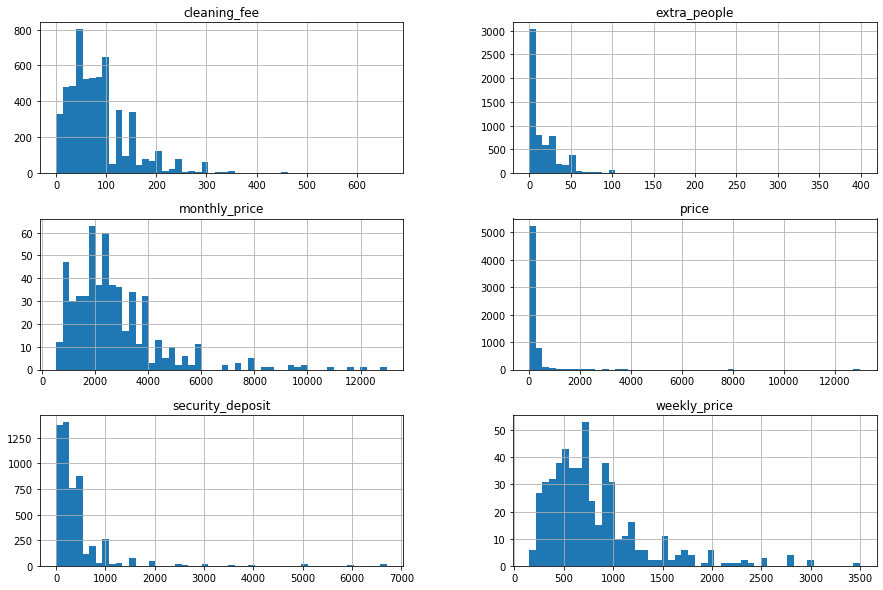

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

price = airbnb[['price', 'weekly_price', 'monthly_price', 
                'security_deposit', 'cleaning_fee', 'extra_people']]

price.hist(bins = 50, figsize = (15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5C81D9320>,
      dtype=object)

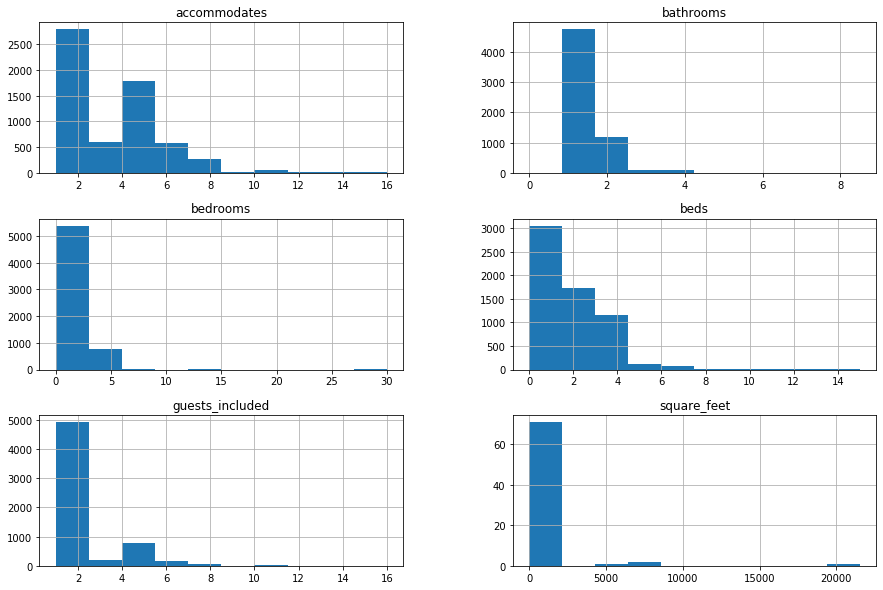

In [8]:
basic = airbnb[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included']]

basic.hist(bins = 10, figsize = (15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5C90DB668>,
      dtype=object)

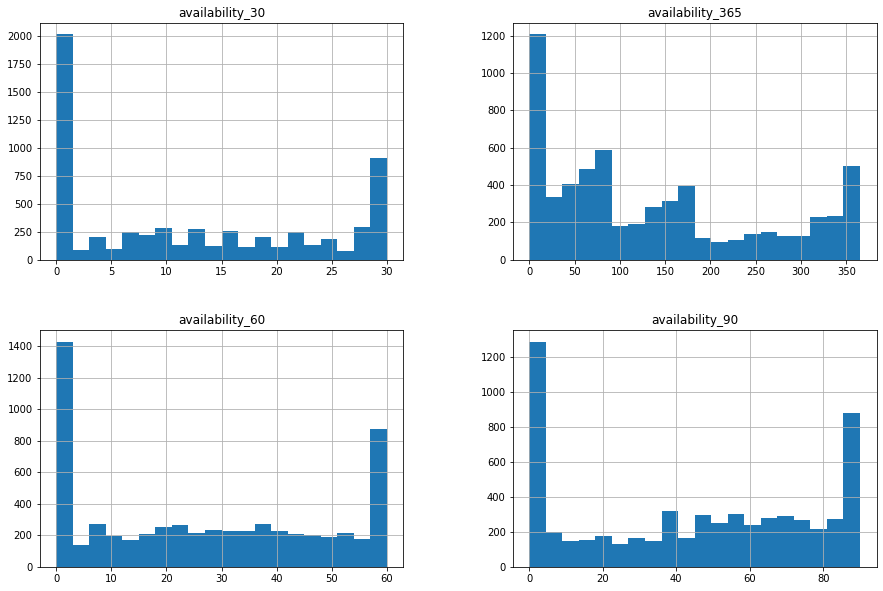

In [9]:
availability = airbnb_num[['availability_30', 'availability_60', 'availability_90', 'availability_365']]

availability.hist(bins = 20, figsize = (15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5CA593978>,
      dtype=object)

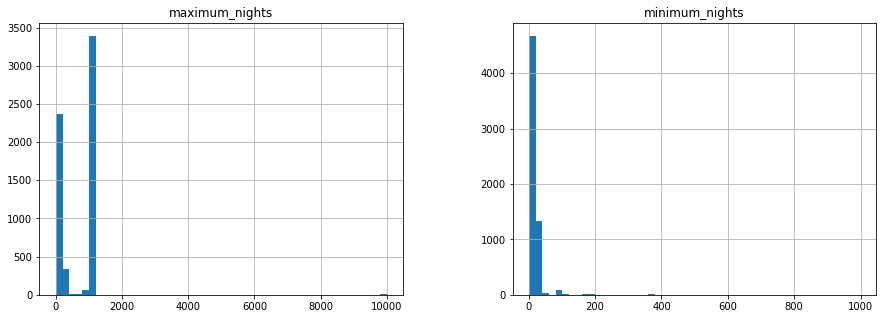

In [10]:
nights = airbnb_num[['minimum_nights', 'maximum_nights']]

nights.hist(bins = 50, figsize = (15, 5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5CA955048>,
      dtype=object)

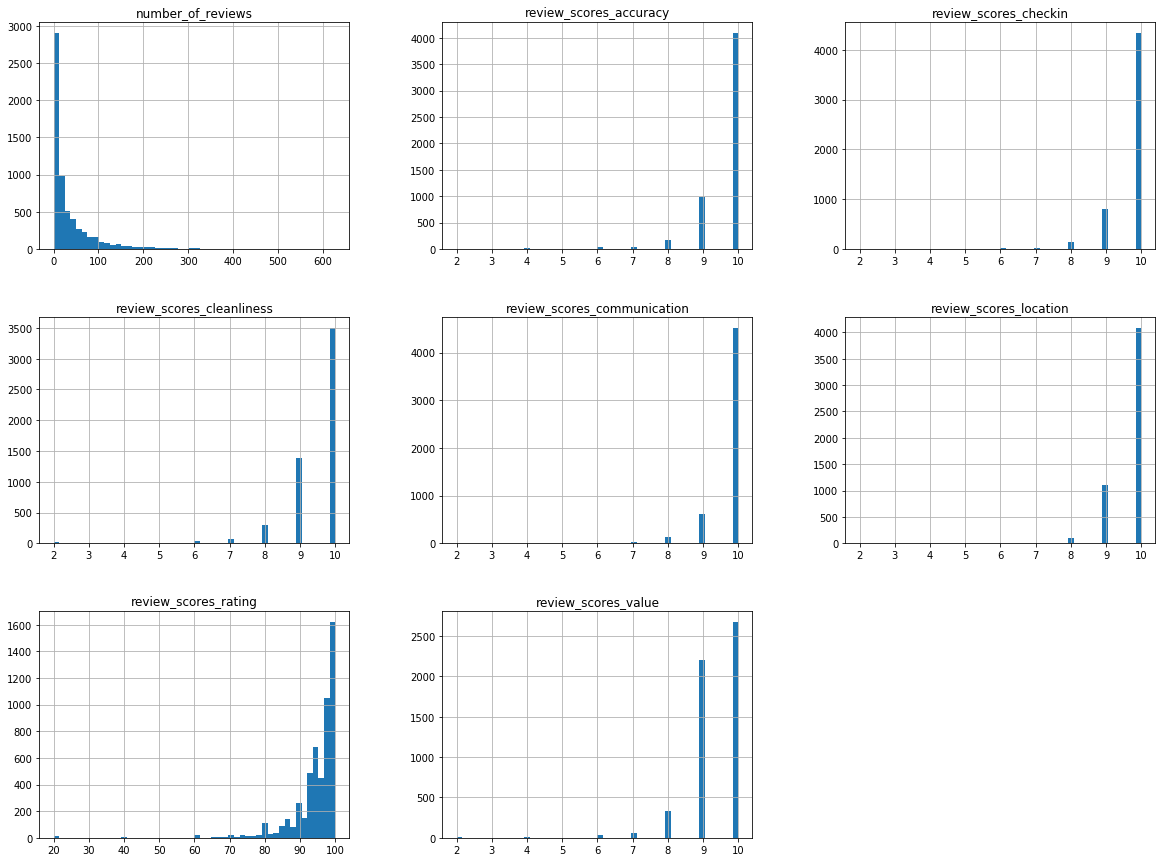

In [11]:
reviews = airbnb_num[['number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 
                      'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                      'review_scores_location', 'review_scores_value']]

reviews.hist(bins = 50, figsize = (20, 15))

From the above histograms we find there are some outliers. To be specific, the distributions of the `review score` related attributes are left skewed while the distributions of the `basic` attributes and price-related attributes are right skewed. For example, some value in (daily) `price` is more than $2000. 

In [12]:
from plotnine import *

host_melted = pd.melt(airbnb, id_vars = ['host_id'],
                      value_vars = ['host_identity_verified', 'host_is_superhost', 'host_has_profile_pic']) 

host_count = host_melted.replace(np.NaN,'NA').groupby(['value', 'variable']).count().reset_index()
host_count.rename(columns = {'host_id': 'Count'}, inplace = True)

host_count

,value,variable,Count
0,NA,host_has_profile_pic,6
1,NA,host_identity_verified,6
2,NA,host_is_superhost,6
3,f,host_has_profile_pic,10
4,f,host_identity_verified,3904
5,f,host_is_superhost,3922
6,t,host_has_profile_pic,6165
7,t,host_identity_verified,2271
8,t,host_is_superhost,2253


### 3.2  Categorical Attributes

#### 3.2.1 Host

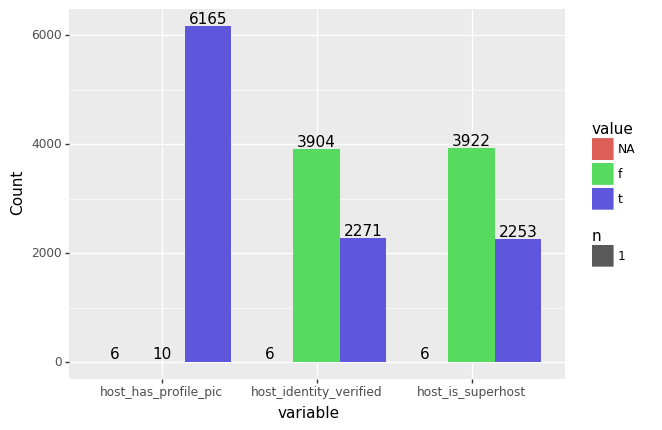

<ggplot: (134704081023)>

In [13]:
ggplot(host_count, aes(x = 'variable', y = 'Count', fill = 'value')) +\
    geom_bar(stat = 'sum', position = 'dodge') +\
    geom_text(aes(label = 'Count'), position = position_dodge(0.9), vjust = 'bottom')

#### 3.2.2 Accomodation Type

C:\Data\Anaconda3\lib\site-packages\plotnine\scales\scale.py:91: PlotnineWarning: scale_x_discrete could not recognise parameter `reverse`
  warn(msg.format(self.__class__.__name__, k), PlotnineWarning)


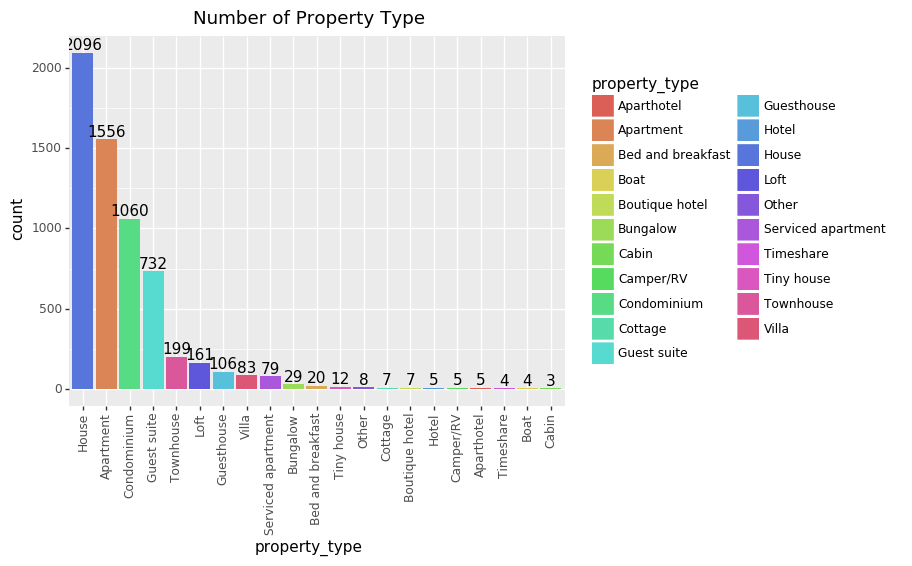

<ggplot: (134704155126)>

In [14]:
property_list = airbnb['property_type'].value_counts().index.tolist()

ggplot(airbnb, aes(x = 'property_type', fill = 'property_type')) +\
    geom_bar() +\
    theme(axis_text_x = element_text(angle = 90)) +\
    scale_x_discrete(limits = property_list, reverse = True) +\
    geom_text(aes(label = 'stat(count)'), stat = 'count', va = 'bottom') +\
    ggtitle('Number of Property Type')

C:\Data\Anaconda3\lib\site-packages\plotnine\scales\scale.py:91: PlotnineWarning: scale_x_discrete could not recognise parameter `reverse`
  warn(msg.format(self.__class__.__name__, k), PlotnineWarning)


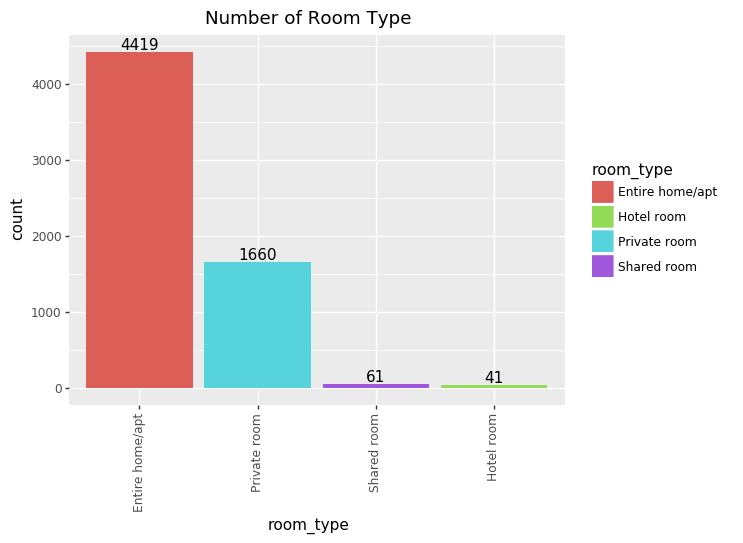

<ggplot: (-9223371902150226951)>

In [15]:
room_list = airbnb['room_type'].value_counts().index.tolist()

ggplot(airbnb, aes(x = 'room_type', fill = 'room_type')) +\
    geom_bar() +\
    theme(axis_text_x = element_text(angle = 90)) +\
    scale_x_discrete(limits = room_list, reverse = True) +\
    geom_text(aes(label = 'stat(count)'), stat = 'count', va = 'bottom') +\
    ggtitle('Number of Room Type')

#### 3.2.3 Location

*How listings are distributed in Vancouver and in which areas listings are distributed densely?*
Obviously, Downtown Vancouver has the dominant listings.

*How are room types dispersed throughout the city?*
Entire homes and apartments are widely dispersed while the number of private rooms come second.

C:\Data\Anaconda3\lib\site-packages\plotnine\scales\scale.py:91: PlotnineWarning: scale_x_discrete could not recognise parameter `reverse`
  warn(msg.format(self.__class__.__name__, k), PlotnineWarning)


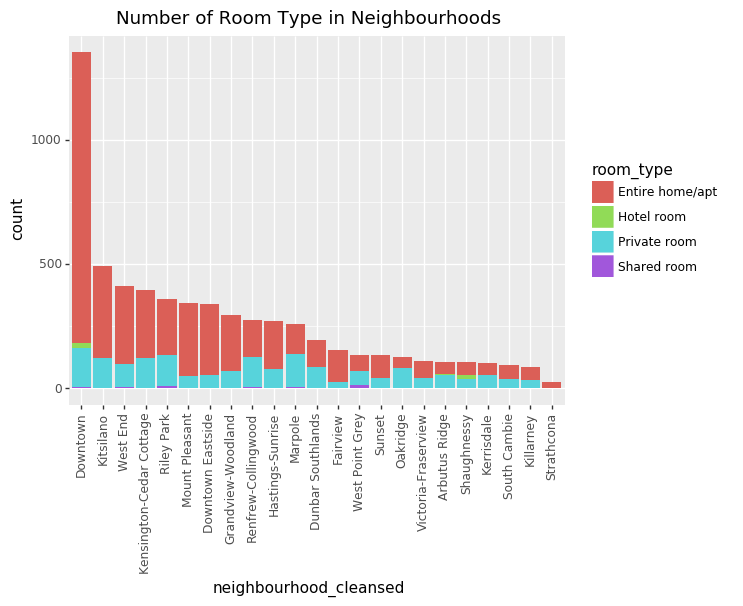

<ggplot: (-9223371902150223942)>

In [16]:
neighbourhood_list = airbnb['neighbourhood_cleansed'].value_counts().index.tolist()

ggplot(airbnb, aes(x = 'neighbourhood_cleansed', fill = 'room_type')) +\
    geom_bar() +\
    theme(axis_text_x = element_text(angle = 90)) +\
    scale_x_discrete(limits = neighbourhood_list, reverse = True) +\
    ggtitle('Number of Room Type in Neighbourhoods')

*Which neighbourhoods are most expensive on average to rent an Airbnb?* Downtown, Kitslano, and West End are the top 3 expensive to rent an Airbnb in Vancouver, more than $200 per night.

*Which neighbourhoods are most economical on average to rent an Airbnb?* Victoria-Fraserview, Renfrew-Collingwood, and Hastings-Sunrise are the three most economical neighbourhoos for Airbnb, less than $120 per night.

C:\Data\Anaconda3\lib\site-packages\plotnine\scales\scale.py:91: PlotnineWarning: scale_x_discrete could not recognise parameter `reverse`
  warn(msg.format(self.__class__.__name__, k), PlotnineWarning)


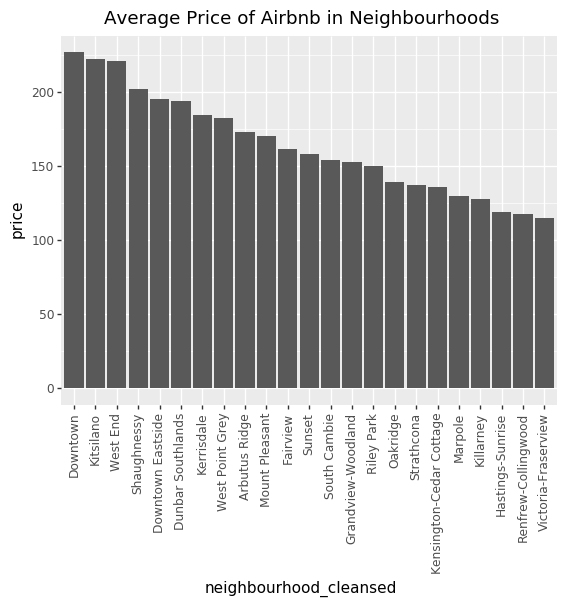

<ggplot: (134704753416)>

In [17]:
neighbourhood_avg_price = airbnb.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending = False)
avg_price = neighbourhood_avg_price.to_frame().reset_index()
neighbour_price_list = avg_price['neighbourhood_cleansed'].tolist()

ggplot(avg_price, aes(x = 'neighbourhood_cleansed', y = 'price')) +\
    geom_bar(stat = 'identity') +\
    theme(axis_text_x = element_text(angle = 90)) +\
    scale_x_discrete(limits = neighbour_price_list, reverse = True) +\
    ggtitle('Average Price of Airbnb in Neighbourhoods')

### 3.3 Missing Values

Start with the missing values in numerical data:

In [18]:
airbnb_num.isna().sum()    

id                                                 0
scrape_id                                          0
thumbnail_url                                   6181
medium_url                                      6181
xl_picture_url                                  6181
host_id                                            0
host_response_rate                               781
host_acceptance_rate                            6181
host_listings_count                                6
host_total_listings_count                          6
latitude                                           0
longitude                                          0
accommodates                                       0
bathrooms                                          2
bedrooms                                           2
beds                                               4
square_feet                                     6106
price                                              0
weekly_price                                  

The values in `thumbnail_url`, `medium_url`, `xl_picture_url`, `host_acceptance_rate`are all missing in all data points, so I decide to delete these attributes.

The missing values in the following attributes are not imputable as they account for more than 5% of the total data points in its correspoinding attributes. Particularly, there are thousands of missing values in `square_feet`, `weekly_price`, `monthly_price`.

As `weekly_price`, `monthly_price` may be related to `price`, I will check their correlation and then decide if keeping them as the attributes for training.

In [19]:
airbnb_num.columns[airbnb_num.isna().sum() > len(airbnb_num) * 0.05].tolist()  

['thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_response_rate',
 'host_acceptance_rate',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [20]:
airbnb = airbnb.drop(['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate'], axis = 1)

### 3.4 Visualizng Geographical Data

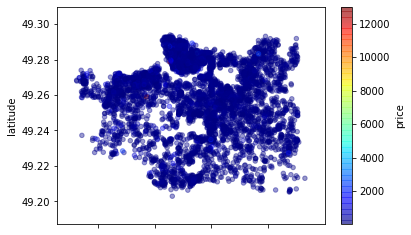

In [21]:
airbnb.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4,
            c = 'price', cmap = plt.get_cmap('jet'), colorbar = True)

In [22]:
airbnb['longitude'].min()
airbnb['longitude'].max()
airbnb['latitude'].min()
airbnb['latitude'].max()

-123.21878999999998

-123.01749

49.2029

49.29388

Text(0.5, 1.0, 'Vancouver Airbnb Prices')

Text(0, 0.5, 'Latitude')

Text(0.5, 0, 'Longitude')

[   15.  2612.  5209.  7806. 10403. 13000.]


[Text(1, 0, '$15'),
 Text(1, 0, '$2612'),
 Text(1, 0, '$5209'),
 Text(1, 0, '$7806'),
 Text(1, 0, '$10403')]

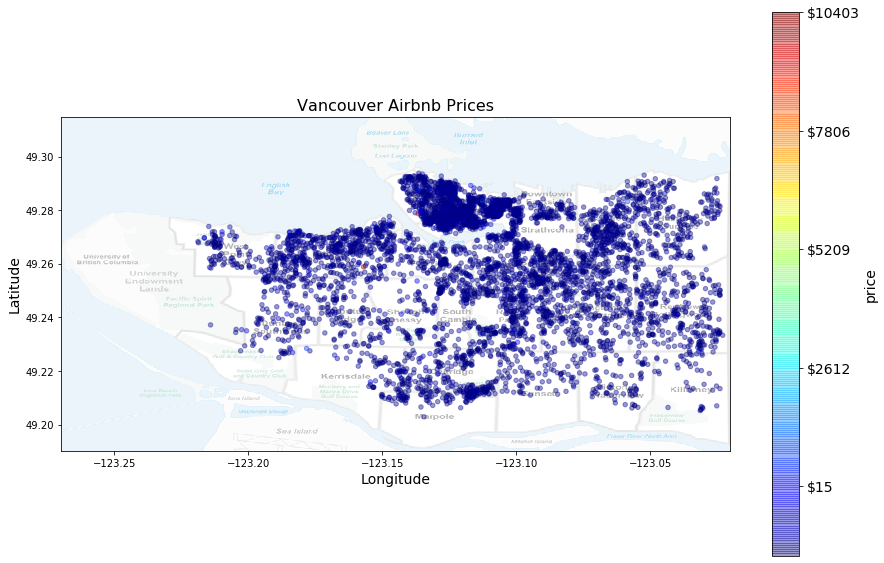

In [23]:
import matplotlib.image as mpimg

Vancouver_img=mpimg.imread('neighbourhoods_Vancouver_2008.png')

airbnb.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4, figsize = (15, 10),
            c = 'price', cmap = plt.get_cmap('jet'), colorbar = False)

plt.imshow(Vancouver_img,  extent=[-123.27, -123.02, 49.19, 49.315], alpha = 0.4,
           cmap = plt.get_cmap("jet"))

plt.title('Vancouver Airbnb Prices', fontsize = 16)
plt.ylabel("Latitude", fontsize = 14)
plt.xlabel("Longitude", fontsize = 14)

prices = airbnb['price']
tick_values = np.linspace(prices.min(), prices.max(), 6)
print(tick_values)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%d"%v for v in tick_values], fontsize = 14)
cbar.set_label('price', fontsize = 14)

### 3.5 Seeking Correlations

In [24]:
corr_matrix = airbnb.corr()

corr_matrix['price'].sort_values(ascending = False)

price                                           1.000000e+00
weekly_price                                    6.481342e-01
monthly_price                                   6.091735e-01
accommodates                                    3.424694e-01
bathrooms                                       3.369209e-01
cleaning_fee                                    3.313693e-01
bedrooms                                        2.767677e-01
beds                                            2.743401e-01
security_deposit                                2.143912e-01
guests_included                                 1.963197e-01
extra_people                                    1.053012e-01
square_feet                                     9.851114e-02
latitude                                        8.097150e-02
review_scores_location                          6.599151e-02
availability_365                                5.528551e-02
availability_30                                 4.806922e-02
availability_60         

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5D2392A58>,
      dtype=object)

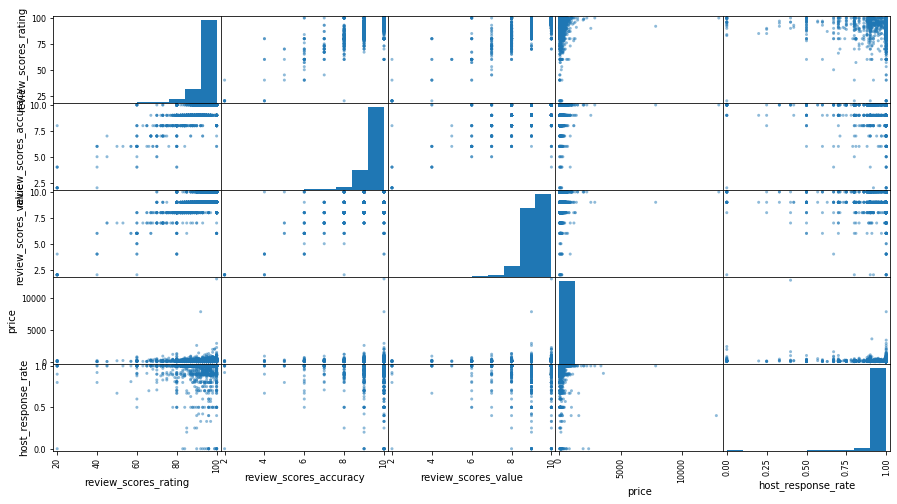

In [25]:
from pandas.plotting import scatter_matrix

attributes = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_value', 
              'price', 'host_response_rate']

scatter_matrix(airbnb[attributes], figsize = (15, 8))

## 4 Data Preparation

As <a href="https://github.com/vcai01/know_before_you_go">the target audience</a> is clarified, it is less likely for newcomers to rent a short-term place accommodating more than the number of their household members. Also, it is unusual for newcomers to spend more than $1000 on short-term accommodation for only one night, so I subset the data and use the `airbnb_newcomers` as a new dataset for analysis hereafter.

### 4.1 Select Data

In [26]:
col_list = airbnb.columns[airbnb.isna().sum() < len(airbnb) * 0.05].tolist()
airbnb_new = airbnb[col_list]

airbnb_new['price'].min()
airbnb_new['price'].max()

15.0

13000.0

In [27]:
airbnb_newcomers = airbnb_new[(airbnb_new['accommodates'] <= 6) & (airbnb_new['price'] < 1000)]
airbnb_newcomers.shape

(5733, 75)

Delete redundant and duplicate categorical attributes:

In [28]:
attributes_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'description', 
                   'experiences_offered', 'picture_url', 'host_id', 'host_listings_count', 
                   'host_url', 'host_name', 'host_since', 'host_location', 'host_thumbnail_url', 
                   'host_picture_url', 'host_total_listings_count',  'street', 'neighbourhood', 
                   'neighbourhood_group_cleansed', 'city', 'state', 'market', 'smart_location', 
                   'country_code', 'country', 'minimum_minimum_nights', 'maximum_minimum_nights', 
                   'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 
                   'maximum_nights_avg_ntm', 'has_availability', 'calendar_updated', 
                   'calendar_last_scraped', 'number_of_reviews_ltm', 'jurisdiction_names', 
                   'instant_bookable', 'is_business_travel_ready', 
                   'calculated_host_listings_count_entire_homes', 
                   'calculated_host_listings_count_private_rooms', 
                   'calculated_host_listings_count_shared_rooms']

airbnb_newcomers = airbnb_newcomers.drop(attributes_drop, axis = 1)

airbnb_newcomers.shape

(5733, 33)

### 4.2 Construct New Data

As the price for one night is set for a fixed number of guests and the extra person staying in the place will be charged additionally (`extra_people` in the unite of dollars rather than person), here is the `price per person` if the place is lived by maximal persons.

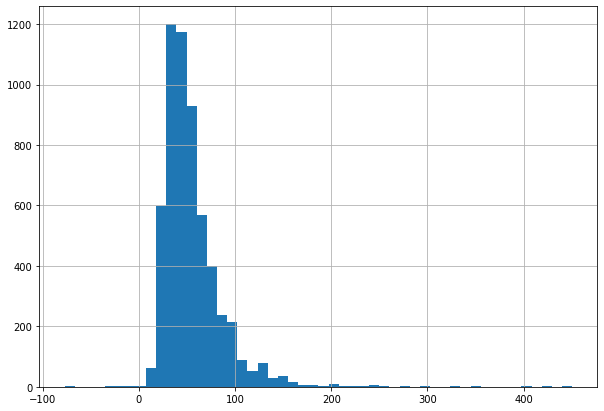

In [29]:
airbnb_newcomers['price_per_person'] = (airbnb['price'] + (airbnb['accommodates'] - airbnb['guests_included']) 
                                        * airbnb['extra_people'])/airbnb['accommodates']

avg_price = airbnb_newcomers['price_per_person']
avg_price.hist(bins = 50, figsize = (10, 7))

There are a few data quirks that `price per person` is minus, which needs a second look. There is some inconsistency that the number of `guests included` exceed the limit of guests, that is, how many guests these places could accommodate.

There are two possibilities: 1) the host input the data incorrectly (either `accommodates` or `guests included`); 2) the host actually agreed to accomodate more guests (even thought it may exceed the limit) as long as the extra guests are charged. Whether the practice meets the fire and safety regulation is beyond the scope of discussion here.

In [30]:
airbnb_newcomers[airbnb_newcomers['price_per_person'] < 0]

,id,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,requires_license,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,price_per_person
2012,20960560,f,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,Downtown,V6B 1X2,49.28002,-123.11141,t,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Smoking allo...",129.0,4,50.0,30,180,0,0,0,0,58,t,strict_14_with_grace_period,f,f,2,-21.000000
2417,23810907,t,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Mount Pleasant,V5T 2A8,49.26070,-123.08880,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""F...",99.0,10,20.0,2,1125,6,26,56,56,82,t,flexible,f,f,2,-30.500000
2927,27164687,f,"['email', 'phone']",t,f,West End,V6G 1K5,49.28990,-123.13630,t,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,""Smoking allowed"",Elevator,Heati...",73.0,4,50.0,3,4,3,3,3,3,4,t,moderate,f,f,1,-77.000000
3612,30994676,t,"['phone', 'offline_government_id', 'selfie', '...",t,f,Kitsilano,V6K 2T7,49.25909,-123.16922,t,Villa,Entire home/apt,6,1.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",151.0,8,100.0,1,1125,8,15,31,89,42,t,strict_14_with_grace_period,f,f,1,-8.166667
3989,33287191,f,"['email', 'phone', 'selfie']",t,f,Kensington-Cedar Cottage,V5V 1S1,49.25112,-123.08893,t,Guest suite,Private room,2,1.5,3.0,3.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""P...",85.0,4,50.0,2,30,24,47,47,47,27,t,flexible,f,f,1,-7.500000


### 4.3 Clean Data

#### 4.3.1 Missing Values

In [31]:
airbnb_newcomers.isna().sum()    

id                                   0
host_is_superhost                    4
host_verifications                   0
host_has_profile_pic                 4
host_identity_verified               4
neighbourhood_cleansed               0
zipcode                             81
latitude                             0
longitude                            0
is_location_exact                    0
property_type                        0
room_type                            0
accommodates                         0
bathrooms                            2
bedrooms                             2
beds                                 4
bed_type                             0
amenities                            0
price                                0
guests_included                      0
extra_people                         0
minimum_nights                       0
maximum_nights                       0
availability_30                      0
availability_60                      0
availability_90          

In [32]:
bbb = airbnb_newcomers.loc[:, ['bathrooms', 'bedrooms', 'beds']].copy()
bbb.fillna(bbb.median(), inplace=True)

airbnb_newcomers[['bathrooms', 'bedrooms', 'beds']] = bbb
airbnb_newcomers.isna().sum()

column_list = airbnb_newcomers.columns.tolist()

id                                   0
host_is_superhost                    4
host_verifications                   0
host_has_profile_pic                 4
host_identity_verified               4
neighbourhood_cleansed               0
zipcode                             81
latitude                             0
longitude                            0
is_location_exact                    0
property_type                        0
room_type                            0
accommodates                         0
bathrooms                            0
bedrooms                             0
beds                                 0
bed_type                             0
amenities                            0
price                                0
guests_included                      0
extra_people                         0
minimum_nights                       0
maximum_nights                       0
availability_30                      0
availability_60                      0
availability_90          

In [33]:
from sklearn.impute import SimpleImputer

airbnb_newcomers['zipcode'] = airbnb_newcomers['zipcode'].str[:3]

nghb = airbnb_newcomers.loc[:, ['neighbourhood_cleansed', 'zipcode']].copy()

zc_missing_nghb = nghb[nghb['zipcode'].isna()]['neighbourhood_cleansed'].unique().tolist()

for x in zc_missing_nghb:
    same_nghb = nghb.loc[nghb['neighbourhood_cleansed'] == x, :].copy()
    imp = SimpleImputer(strategy = 'most_frequent')
    nghb[nghb['neighbourhood_cleansed'] == x] = imp.fit_transform(same_nghb)

airbnb_newcomers[['neighbourhood_cleansed', 'zipcode']] = nghb

airbnb_newcomers.isna().sum()

id                                  0
host_is_superhost                   4
host_verifications                  0
host_has_profile_pic                4
host_identity_verified              4
neighbourhood_cleansed              0
zipcode                             0
latitude                            0
longitude                           0
is_location_exact                   0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
amenities                           0
price                               0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
availability_30                     0
availability_60                     0
availability_90                     0
availability

In [34]:
host = airbnb_newcomers.loc[:, ['host_is_superhost', 'host_has_profile_pic', 
                                'host_identity_verified']].copy()

imp = SimpleImputer(strategy = 'most_frequent')
airbnb_newcomers[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified']] = imp.fit_transform(host)

airbnb_newcomers.isna().sum()

id                                  0
host_is_superhost                   0
host_verifications                  0
host_has_profile_pic                0
host_identity_verified              0
neighbourhood_cleansed              0
zipcode                             0
latitude                            0
longitude                           0
is_location_exact                   0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
amenities                           0
price                               0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
availability_30                     0
availability_60                     0
availability_90                     0
availability

#### 4.3.2 Categorical Attributes

In [35]:
airbnb_newcomers.select_dtypes(include=['object']).dtypes

host_is_superhost                   object
host_verifications                  object
host_has_profile_pic                object
host_identity_verified              object
neighbourhood_cleansed              object
zipcode                             object
is_location_exact                   object
property_type                       object
room_type                           object
bed_type                            object
amenities                           object
requires_license                    object
cancellation_policy                 object
require_guest_profile_picture       object
require_guest_phone_verification    object
dtype: object

There are several types of categorical variables in the dataset:

1. Binary variable: t / f in this case
2. Ordinal variables
3. Nominal variables

Usually the categorical variable taking less than 15 different values could be selected for one hot encoding as it won't work well on a large number of values. Here I use the benchmark to differentiate the variables.

In [36]:
index = airbnb_newcomers.select_dtypes(include=['object']).dtypes.index

cat_attributes_binary = []
cat_attributes_OneHot = []
cat_attributes_others = []

for i in index:
    no = len(airbnb_newcomers[i].unique())
    if no == 2:
        cat_attributes_binary.append(i)
    if 2 < no <= 15:
        cat_attributes_OneHot.append(i)
    if no > 15: 
        cat_attributes_others.append(i)
    
cat_attributes_binary
cat_attributes_OneHot
cat_attributes_others

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'is_location_exact',
 'requires_license',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

['room_type', 'bed_type', 'cancellation_policy']

['host_verifications',
 'neighbourhood_cleansed',
 'zipcode',
 'property_type',
 'amenities']

First, transform binary variables into boolean:

In [37]:
for i in cat_attributes_binary:
    airbnb_newcomers[i] = airbnb_newcomers[i].str.contains('t')
    airbnb_newcomers[i] = airbnb_newcomers[i].astype(int)

Second, transform ordinal variables. 

In [38]:
airbnb_newcomers['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In terms of privacy and convenience of `room_type`, assume Shared room < Hotel room = Private room < Entire home/apt:

In [39]:
room_dict = {'Shared room': 1, 'Private room': 2, 'Hotel room': 2, 'Entire home/apt': 3}

airbnb_newcomers['room_type'] = airbnb_newcomers['room_type'].map(room_dict)

In [40]:
airbnb_newcomers['bed_type'].unique()

array(['Real Bed', 'Pull-out Sofa', 'Airbed', 'Futon', 'Couch'],
      dtype=object)

In terms of comfort, assume Airbed = Futon = Couch < Pull-out Sofa < Real Bed:

In [41]:
bed_dict = {'Airbed': 1, 'Futon': 1, 'Couch': 1, 'Pull-out Sofa': 2, 'Real Bed': 3}

airbnb_newcomers['bed_type'] = airbnb_newcomers['bed_type'].map(bed_dict)

In [42]:
airbnb_newcomers['cancellation_policy'].unique()

array(['strict_14_with_grace_period', 'moderate', 'flexible', 'strict'],
      dtype=object)

In terms of flexibility of cancellation poliby, strict < strict_14_with_grace_period < moderate < flexible:

In [43]:
cancel_dict = {'strict': 1, 'strict_14_with_grace_period': 2, 'moderate': 3, 'flexible': 4}

airbnb_newcomers['cancellation_policy'] = airbnb_newcomers['cancellation_policy'].map(cancel_dict)

Third, let's deal with the categorical variables taking more than 15 different values. 

In [44]:
for i in cat_attributes_others:
    print(i, airbnb_newcomers[i].nunique(), 'values')

host_verifications 203 values
neighbourhood_cleansed 23 values
zipcode 55 values
property_type 21 values
amenities 5454 values


In [45]:
airbnb_newcomers['host_verifications'][:5]

0    ['email', 'phone', 'reviews', 'jumio', 'govern...
1    ['email', 'phone', 'facebook', 'reviews', 'jum...
2    ['email', 'phone', 'reviews', 'jumio', 'offlin...
3    ['email', 'phone', 'reviews', 'offline_governm...
4                        ['email', 'phone', 'reviews']
Name: host_verifications, dtype: object

There are multiple ways to verify a host's identity, such as `email`, `phone`, `facebood`, `government_id`, in which I assume `government_id` is the most reliable one. Thus I transform the attribute into a binary one: true (verified with`government_id`) or false (not verified, without `government_id`):


In [46]:
airbnb_newcomers['host_verifications'] = airbnb_newcomers['host_verifications'].str.contains('government_id')

In [47]:
airbnb_newcomers.drop(['zipcode', 'neighbourhood_cleansed'], axis = 1, inplace = True)

In [48]:
airbnb_newcomers['amenities'][:5]

0    {TV,"Cable TV",Internet,Wifi,"Air conditioning...
1    {TV,"Cable TV",Internet,Wifi,Kitchen,"Free par...
2    {TV,"Cable TV",Internet,Wifi,"Wheelchair acces...
3    {TV,"Cable TV",Internet,Wifi,"Wheelchair acces...
4    {TV,Internet,Wifi,Kitchen,"Pets allowed","Free...
Name: amenities, dtype: object

Based on my personal experience and the focus group research on other immigrants, `wifi` and `kitchen` are assumed significant amenities to the target audience in finding short-term accommodations for landing.

In [49]:
airbnb_newcomers['wifi'] = airbnb_newcomers['amenities'].str.contains('wifi', case = False)
airbnb_newcomers['kitchen'] = airbnb_newcomers['amenities'].str.contains('kitchen', case = False)
del airbnb_newcomers['amenities']

There are 21 values in `property_type`. The top 6 accounts for 93.86% of the dataset (5381 / 5733). Actually we don't need such detailed categories. I combine a few values (not in the top 6) to reduce the numbers of different values for the one-hot encoding afterwards.

In [50]:
for i in ['host_verifications', 'wifi', 'kitchen']:
    airbnb_newcomers[i] = airbnb_newcomers[i].astype(int)

In [51]:
airbnb_newcomers.groupby('property_type')['id'].count().sort_values(ascending = False)

property_type
House                 1800
Apartment             1513
Condominium           1018
Guest suite            714
Townhouse              181
Loft                   155
Guesthouse              98
Serviced apartment      78
Villa                   72
Bungalow                27
Bed and breakfast       20
Tiny house              12
Other                    7
Cottage                  7
Boutique hotel           7
Hotel                    5
Camper/RV                5
Aparthotel               5
Timeshare                4
Boat                     3
Cabin                    2
Name: id, dtype: int64

In [52]:
airbnb_newcomers['property_type'].replace(['Guesthouse', 'Villa', 'Bungalow'], 'House', inplace = True)
airbnb_newcomers['property_type'].replace('Serviced apartment', 'Apartment', inplace = True)
airbnb_newcomers['property_type'].replace(['Bed and breakfast', 'Tiny house', 'Cottage', 'Boutique hotel', 
                                           'Hotel', 'Camper/RV', 'Aparthotel', 'Timeshare', 'Boat', 
                                           'Cabin'], 'Other', inplace = True)

airbnb_newcomers.groupby('property_type')['id'].count().sort_values(ascending = False)

property_type
House          1997
Apartment      1591
Condominium    1018
Guest suite     714
Townhouse       181
Loft            155
Other            77
Name: id, dtype: int64

In [53]:
airbnb_newcomers.head()

,id,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,requires_license,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,price_per_person,wifi,kitchen
0,10080,0,1,1,1,49.28772,-123.12110,1,Condominium,3,6,2.0,2.0,4.0,3,151.0,1,0.0,60,1124,0,6,36,311,16,1,2,0,0,43,25.166667,1,1
1,13188,1,1,1,1,49.24577,-123.10516,1,Apartment,3,4,1.0,0.0,2.0,3,120.0,1,0.0,2,180,13,28,36,183,225,1,3,0,0,1,30.000000,1,1
2,13357,0,1,1,1,49.27955,-123.10546,1,Apartment,3,4,2.0,2.0,2.0,3,152.0,2,33.0,30,90,0,11,41,316,57,1,2,1,1,3,54.500000,1,1
3,13490,1,1,1,0,49.25550,-123.06696,1,Apartment,3,2,1.0,1.0,1.0,3,145.0,1,0.0,30,90,23,29,51,296,84,1,2,0,0,1,72.500000,1,1
4,14267,0,0,1,0,49.24974,-123.08108,1,House,3,4,1.0,1.0,2.0,3,140.0,2,15.0,2,1125,0,0,0,0,31,1,2,0,0,1,42.500000,1,1


In [54]:
OneHot_encoded_df = pd.get_dummies(airbnb_newcomers)

OneHot_encoded_df.head()

,id,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,requires_license,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,price_per_person,wifi,kitchen,property_type_Apartment,property_type_Condominium,property_type_Guest suite,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse
0,10080,0,1,1,1,49.28772,-123.12110,1,3,6,2.0,2.0,4.0,3,151.0,1,0.0,60,1124,0,6,36,311,16,1,2,0,0,43,25.166667,1,1,0,1,0,0,0,0,0
1,13188,1,1,1,1,49.24577,-123.10516,1,3,4,1.0,0.0,2.0,3,120.0,1,0.0,2,180,13,28,36,183,225,1,3,0,0,1,30.000000,1,1,1,0,0,0,0,0,0
2,13357,0,1,1,1,49.27955,-123.10546,1,3,4,2.0,2.0,2.0,3,152.0,2,33.0,30,90,0,11,41,316,57,1,2,1,1,3,54.500000,1,1,1,0,0,0,0,0,0
3,13490,1,1,1,0,49.25550,-123.06696,1,3,2,1.0,1.0,1.0,3,145.0,1,0.0,30,90,23,29,51,296,84,1,2,0,0,1,72.500000,1,1,1,0,0,0,0,0,0
4,14267,0,0,1,0,49.24974,-123.08108,1,3,4,1.0,1.0,2.0,3,140.0,2,15.0,2,1125,0,0,0,0,31,1,2,0,0,1,42.500000,1,1,0,0,0,1,0,0,0


### 4.4 Split Training and Test Datasets

In [55]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(OneHot_encoded_df, test_size = 0.2, random_state = 42)
print('Training set: {} data points; test set: {} data points'.format(len(train_set), len(test_set)))

Training set: 4586 data points; test set: 1147 data points


In [56]:
train_set.to_csv('airbnb_train_set.csv')
test_set.to_csv('airbnb_test_set.csv')